In [18]:
# Libraries
from waveome.model_search import GPKernelSearch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [19]:
metadata = pd.read_csv("/Users/rahlab/DataspellProjects/waveome/examples/Marine_microbiome/data/metadata.csv")
microbiome = pd.read_csv("/Users/rahlab/DataspellProjects/waveome/examples/Marine_microbiome/data/microbiome.csv")
outcomes = microbiome.iloc[:,2:]
outcomes.head()
#print(outcomes.iloc[:, 1:5])

,Abiotrophia_defectiva_ATCC_49176,Acanthamoeba_castellanii,Acanthamoeba_polyphaga_mimivirus,Acanthocystis_turfacea_Chlorella_virus_1,Acaryochloris,Acaryochloris_marina_MBIC11017,Acetivibrio_cellulolyticus_CD2,Acetobacter,Acetobacter_aceti_NBRC_14818,Acetobacter_pomorum_DM001,...,Vibrio_phage_fs2,Triticeae,Paretroplus_maculatus,Lactococcus_phage_P335_sensu_lato,Burkholderia_phage_KL3,Ureaplasma_parvum_serovar_14_str._ATCC_33697,Actinobacillus_pleuropneumoniae_serovar_9_str._CVJ13261,Mycobacterium_africanum_GM041182,Igernella_notabilis,Francisella_tularensis_subsp._holarctica_257
0,12,0,39,8,15,43,31,28,38,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,1,51,11,13,31,25,17,41,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,0,15,4,16,18,10,13,14,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,0,54,20,18,38,24,21,18,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,27,15,23,26,25,22,32,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df = pd.DataFrame(
    {
        'sample_id': metadata['Sample_Id'],
        'sample_name': metadata['Sample_name'],
        'depth' : metadata['depth_(m)'],
        'time': metadata['Time'],
        'chemistry': metadata['chemistry'],
    }
).sort_values(['sample_id', 'time'])

for col  in outcomes.iloc[:,:]:
    df[col] = outcomes[col]

print(f'Dimension of dataset: {df.shape}')

df.head()

/var/folders/c3/fpwvljr94f5blbhd0b5dh87w0000gs/T/ipykernel_77187/3179676816.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = outcomes[col]
/var/folders/c3/fpwvljr94f5blbhd0b5dh87w0000gs/T/ipykernel_77187/3179676816.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = outcomes[col]
/var/folders/c3/fpwvljr94f5blbhd0b5dh87w0000gs/T/ipykernel_77187/3179676816.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

Dimension of dataset: (42, 7194)


/var/folders/c3/fpwvljr94f5blbhd0b5dh87w0000gs/T/ipykernel_77187/3179676816.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = outcomes[col]
/var/folders/c3/fpwvljr94f5blbhd0b5dh87w0000gs/T/ipykernel_77187/3179676816.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = outcomes[col]
/var/folders/c3/fpwvljr94f5blbhd0b5dh87w0000gs/T/ipykernel_77187/3179676816.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

,sample_id,sample_name,depth,time,chemistry,Abiotrophia_defectiva_ATCC_49176,Acanthamoeba_castellanii,Acanthamoeba_polyphaga_mimivirus,Acanthocystis_turfacea_Chlorella_virus_1,Acaryochloris,...,Vibrio_phage_fs2,Triticeae,Paretroplus_maculatus,Lactococcus_phage_P335_sensu_lato,Burkholderia_phage_KL3,Ureaplasma_parvum_serovar_14_str._ATCC_33697,Actinobacillus_pleuropneumoniae_serovar_9_str._CVJ13261,Mycobacterium_africanum_GM041182,Igernella_notabilis,Francisella_tularensis_subsp._holarctica_257
0,1,HOT194_25m,25,0,flex,12,0,39,8,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,HOT195_25m,25,30,flex,7,1,51,11,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,HOT196_25m,25,57,flex,6,0,15,4,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,HOT197_25m,25,117,flex,10,0,54,20,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,HOT198_25m,25,136,flex,4,0,27,15,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
column_names = df.columns.tolist()
print(column_names[5:])

['Abiotrophia_defectiva_ATCC_49176', 'Acanthamoeba_castellanii', 'Acanthamoeba_polyphaga_mimivirus', 'Acanthocystis_turfacea_Chlorella_virus_1', 'Acaryochloris', 'Acaryochloris_marina_MBIC11017', 'Acetivibrio_cellulolyticus_CD2', 'Acetobacter', 'Acetobacter_aceti_NBRC_14818', 'Acetobacter_pomorum_DM001', 'Acetobacter_tropicalis_NBRC_101654', 'Acetobacteraceae', 'Acetohalobium_arabaticum_DSM_5501', 'Acetonema_longum_DSM_6540', 'Achromobacter', 'Achromobacter_arsenitoxydans_SY8', 'Achromobacter_denitrificans', 'Achromobacter_piechaudii_ATCC_43553', 'Achromobacter_xylosoxidans_A8', 'Acidaminococcaceae', 'Acidaminococcus', 'Acidaminococcus_fermentans_DSM_20731', 'Acidianus_filamentous_virus_3', 'Acidianus_hospitalis_W1', 'Acidimicrobium_ferrooxidans_DSM_10331', 'Acidiphilium', 'Acidiphilium_multivorum_AIU301', 'Acidithiobacillus', 'Acidithiobacillus_caldus', 'Acidithiobacillus_caldus_ATCC_51756', 'Acidithiobacillus_ferrivorans_SS3', 'Acidithiobacillus_ferrooxidans', 'Acidithiobacillus_ferr

In [22]:
column_names = df.columns.tolist()
print(column_names[5:])

['Abiotrophia_defectiva_ATCC_49176', 'Acanthamoeba_castellanii', 'Acanthamoeba_polyphaga_mimivirus', 'Acanthocystis_turfacea_Chlorella_virus_1', 'Acaryochloris', 'Acaryochloris_marina_MBIC11017', 'Acetivibrio_cellulolyticus_CD2', 'Acetobacter', 'Acetobacter_aceti_NBRC_14818', 'Acetobacter_pomorum_DM001', 'Acetobacter_tropicalis_NBRC_101654', 'Acetobacteraceae', 'Acetohalobium_arabaticum_DSM_5501', 'Acetonema_longum_DSM_6540', 'Achromobacter', 'Achromobacter_arsenitoxydans_SY8', 'Achromobacter_denitrificans', 'Achromobacter_piechaudii_ATCC_43553', 'Achromobacter_xylosoxidans_A8', 'Acidaminococcaceae', 'Acidaminococcus', 'Acidaminococcus_fermentans_DSM_20731', 'Acidianus_filamentous_virus_3', 'Acidianus_hospitalis_W1', 'Acidimicrobium_ferrooxidans_DSM_10331', 'Acidiphilium', 'Acidiphilium_multivorum_AIU301', 'Acidithiobacillus', 'Acidithiobacillus_caldus', 'Acidithiobacillus_caldus_ATCC_51756', 'Acidithiobacillus_ferrivorans_SS3', 'Acidithiobacillus_ferrooxidans', 'Acidithiobacillus_ferr

"for i in df.iloc[:, 5:]:\n    plt.figure(figsize=(7.2,4))\n    plt.plot(df.loc[:,'time'], df.loc[:, i])\n    plt.title(i)\n    plt.xlabel('Time')\n    plt.savefig(os.path.join(save_dir, f'{i}.png'))\n    plt.show()"

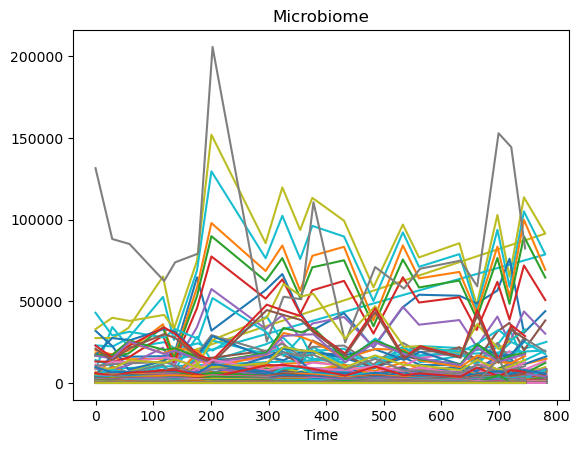

In [23]:
'''for i in outcomes:
    plt.plot(df.loc[:, 'time'], df.loc[:, i])
    plt.title(i)
    plt.xlabel('Time')
    plt.figure(figsize=(7.2,3.6))
'''
save_dir = 'figures'
os.makedirs(save_dir, exist_ok=True)

for i in df.iloc[:, 5:]:
    plt.plot(df.loc[:,'time'], df.loc[:, i])
plt.title('Microbiome')
plt.xlabel('Time')
plt.savefig(os.path.join(save_dir, 'Microbiome.png'))

#Create a plot for each microbiome
'''for i in df.iloc[:, 5:]:
    plt.figure(figsize=(7.2,4))
    plt.plot(df.loc[:,'time'], df.loc[:, i])
    plt.title(i)
    plt.xlabel('Time')
    plt.savefig(os.path.join(save_dir, f'{i}.png'))
    plt.show()'''

In [24]:
# Factorize categorical columns
df["sample_id"], subject_vals = pd.factorize(df["sample_id"])
df["depth"], subject_vals = pd.factorize(df["depth"])
df["chemistry"], chemistry = pd.factorize(df["chemistry"])
df[["sample_id", "depth", "time", "chemistry"]] = df[["sample_id", "depth", "time", "chemistry"]].astype(float)

In [25]:
X = df[['sample_id', 'depth', 'time', 'chemistry']]
X.head()

,sample_id,depth,time,chemistry
0,0.0,0.0,0.0,0.0
1,1.0,0.0,30.0,0.0
2,2.0,0.0,57.0,0.0
3,3.0,0.0,117.0,0.0
4,4.0,0.0,136.0,0.0


In [26]:
df[column_names[5:]] = df[column_names[5:]].astype(float)
Y = df[column_names[5:]]
Y.head()

,Abiotrophia_defectiva_ATCC_49176,Acanthamoeba_castellanii,Acanthamoeba_polyphaga_mimivirus,Acanthocystis_turfacea_Chlorella_virus_1,Acaryochloris,Acaryochloris_marina_MBIC11017,Acetivibrio_cellulolyticus_CD2,Acetobacter,Acetobacter_aceti_NBRC_14818,Acetobacter_pomorum_DM001,...,Vibrio_phage_fs2,Triticeae,Paretroplus_maculatus,Lactococcus_phage_P335_sensu_lato,Burkholderia_phage_KL3,Ureaplasma_parvum_serovar_14_str._ATCC_33697,Actinobacillus_pleuropneumoniae_serovar_9_str._CVJ13261,Mycobacterium_africanum_GM041182,Igernella_notabilis,Francisella_tularensis_subsp._holarctica_257
0,12.0,0.0,39.0,8.0,15.0,43.0,31.0,28.0,38.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.0,1.0,51.0,11.0,13.0,31.0,25.0,17.0,41.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,0.0,15.0,4.0,16.0,18.0,10.0,13.0,14.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,0.0,54.0,20.0,18.0,38.0,24.0,21.0,18.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,0.0,27.0,15.0,23.0,26.0,25.0,22.0,32.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

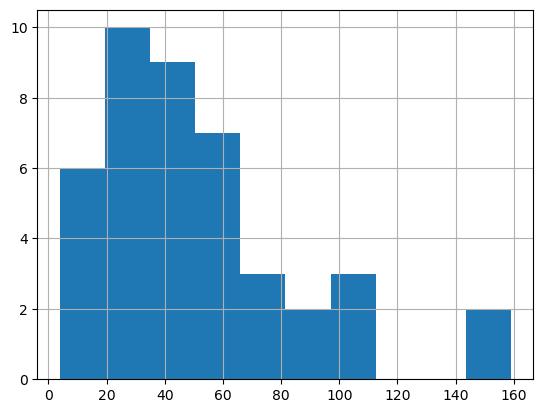

In [27]:
Y.iloc[:, 3].hist()

In [28]:
# Load the information into the Gaussian process search object
gps = GPKernelSearch(
    X=df[['sample_id','depth', 'time', 'chemistry']],
    Y=np.log(df[column_names[5:]]+1),
    # Y=df[column_names[5:10]],
    unit_col= 'sample_id',
    categorical_vars=['depth', 'chemistry'],
    outcome_likelihood='gaussian'  #'poisson'
)

In [29]:
gps.run_search(
    random_seed= 5
)

Kernel search:   6%|▌         | 399/7189 [54:38<12:53:33,  6.84s/it]/Users/rahlab/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Kernel search:  91%|█████████ | 6542/7189 [11:50:21<24:52,  2.31s/it]  /Users/rahlab/DataspellProjects/waveome/waveome/model_search.py:2630: RuntimeWarning: invalid value encountered in double_scalars
  total_rsq = 1 - (ssr_total/sse)
Kernel search:  91%|█████████ | 6544/7189 [11:50:36<55:05,  5.13s/it]/Users/rahlab/DataspellProjects/waveome/waveome/model_search.py:2630: RuntimeWarning: invalid value encountered in double_scalars
  total_rsq = 1 - (ssr_total/sse)
Kernel search:  91%|█████████▏| 6564/7189 [11:51:49<22:49,  2.19s/it]  /Users/rahlab/DataspellProjects/waveome/waveome/model_search.py:2630: RuntimeWarning: invalid value encountered in double_scalars
  

In [32]:
for i in df.columns[5:]:
    gps.models[i]

    if gps.models[i]["best_model"] == "constant":
        print(f"Microbe {i} is constant model, passing.")
        continue

Microbe Acanthamoeba_castellanii is constant model, passing.
Microbe Acidianus_filamentous_virus_3 is constant model, passing.
Microbe Acinetobacter_baumannii_6013113 is constant model, passing.
Microbe Acinetobacter_baumannii_6013150 is constant model, passing.
Microbe Acinetobacter_baumannii_AB056 is constant model, passing.
Microbe Acinetobacter_baumannii_AB058 is constant model, passing.
Microbe Adoxophyes_orana_nucleopolyhedrovirus is constant model, passing.
Microbe Aerococcus is constant model, passing.
Microbe Aeromonadales is constant model, passing.
Microbe Aeromonas_hydrophila is constant model, passing.
Microbe Agriosphodrus_dohrni is constant model, passing.
Microbe Agrotis_ipsilon_multiple_nucleopolyhedrovirus is constant model, passing.
Microbe Agrotis_segetum_granulovirus is constant model, passing.
Microbe Agrotis_segetum_nucleopolyhedrovirus is constant model, passing.
Microbe Alcelaphine_herpesvirus_1 is constant model, passing.
Microbe Alcyonacea is constant model, 

In [ ]:
for i in df.columns[5:10]:
    gps.plot_parts(
        out_label=i,
        x_axis_label='time',
    )

In [ ]:
'''for i in df.columns[5:]:
    gps.plot_marginal(
        out_label= i,
        x_axis_label='time',
        unit_label=0
    )'''

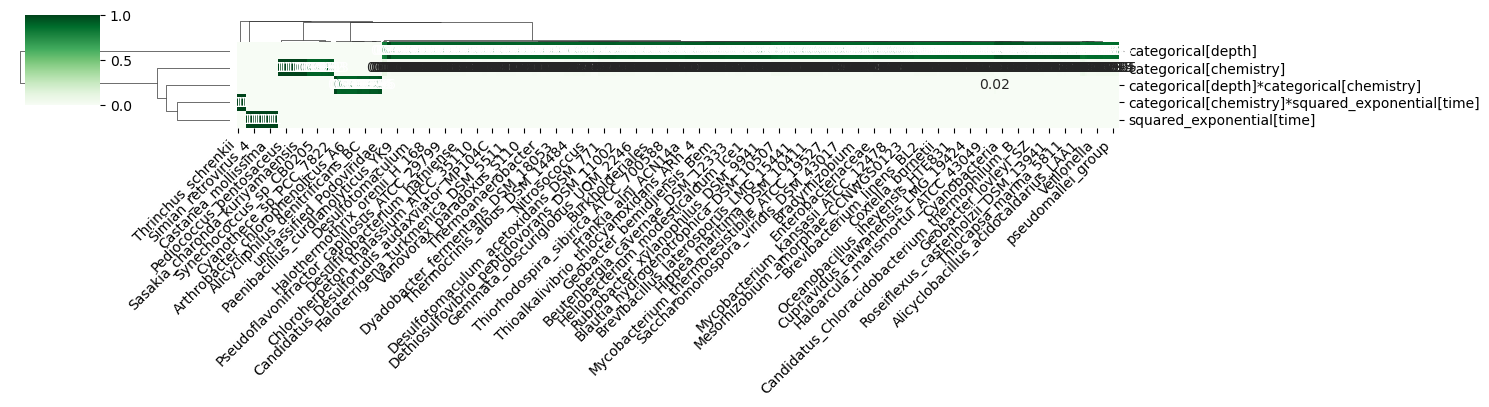

In [42]:
gps.plot_heatmap(var_cutoff=0.9);
#plt.savefig(os.path.join(save_dir, 'Heatmap.png'))